In [ ]:
#Montamos el drive con las imegenes
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Esta linea nos carga la carpeta que queramos en el etorno de ejecucion para poder usarla, en este caso la de las imagenes
!cp -r /content/drive/MyDrive/data_main /content/


##PROCESAMIENTO METADATOS


In [ ]:
#Cargamos el csv

import pandas as pd

df = pd.read_csv('/content/poi_dataset.csv')

df.head().T

,0,1,2,3,4
id,4b36a3ed-3b28-4bc7-b975-1d48b586db03,e32b3603-a94f-49df-8b31-92445a86377c,0123a69b-13ac-4b65-a5d5-71a95560cff5,390d7d9e-e972-451c-b5e4-f494af15e788,023fc1bf-a1cd-4b9f-af78-48792ab1a294
name,Galería Fran Reus,Convento de San Plácido,Instituto Geológico y Minero de España,Margarita Gil Roësset,Museo del Traje. Centro de Investigación del P...
shortDescription,La Galería Fran Reus es un espacio dedicado a ...,"El Convento de San Plácido en Madrid, fundado ...","El Instituto Geológico y Minero de España, sit...","Margarita Gil Roësset, escultora y poetisa esp...","El Museo del Traje de Madrid, fundado en 2004,..."
categories,"['Escultura', 'Pintura']","['Patrimonio', 'Historia']","['Ciencia', 'Patrimonio']",['Cultura'],"['Patrimonio', 'Cultura']"
tier,1,1,2,1,1
locationLon,2.642262,-3.704467,-3.699694,-3.691228,-3.727822
locationLat,39.572694,40.423037,40.442045,40.427256,40.439665
tags,[],[],[],[],[]
xps,500,500,250,500,500
Visits,10009,10010,10015,10011,10020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


In [ ]:
type(df.categories[0])

str

In [ ]:
#A tipos nativos
#Para poder usar lo elementos del dataframe que son tipo objeto, hay que pasarlos a tipos nativos para que python los pueda usar
import ast
df.categories = df.categories.apply(ast.literal_eval)
df.tags = df.tags.apply(ast.literal_eval)

In [ ]:
type(df.categories[0])

list

In [ ]:
#Por el info vemos que no hay nulos, pero en los tags si que hay listas vacias.

df.tags.apply(len).value_counts()


,count
tags,
10,473
13,466
1,136
0,107
4,102
12,88
5,58
3,56
6,33


In [ ]:
#y al parecer en los categories tambien
df.categories.apply(len).value_counts()

,count
categories,
3,1073
4,325
2,106
1,63
0,2


In [ ]:
#ONE_HOT: Multilabel para las categorias
#Lo que entra en una red de neuronas son datos numericos por lo que vamos a tener que codificar nuestras variables categoricas para poder usarlas

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

one_hot = mlb.fit_transform(df['categories'])

#Una vez codificada la variable la juntamos al Df y eliminamos la columna original

df = pd.concat([df,pd.DataFrame(one_hot, columns= mlb.classes_)], axis = 1)
df


,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,...,Cine,Cultura,Escultura,Gastronomía,Historia,Misterio,Naturaleza,Ocio,Patrimonio,Pintura
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"[Escultura, Pintura]",1,2.642262,39.572694,[],500,10009,...,0,0,1,0,0,0,0,0,0,1
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","[Patrimonio, Historia]",1,-3.704467,40.423037,[],500,10010,...,0,0,0,0,1,0,0,0,1,0
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","[Ciencia, Patrimonio]",2,-3.699694,40.442045,[],250,10015,...,0,0,0,0,0,0,0,0,1,0
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",[Cultura],1,-3.691228,40.427256,[],500,10011,...,0,1,0,0,0,0,0,0,0,0
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","[Patrimonio, Cultura]",1,-3.727822,40.439665,[],500,10020,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,a1058fc5-8b4e-43db-8758-2a4197eb69ca,"Plaza de Puerta Cerrada, en Madrid","ANTONIO ORBEGOZO\nPlaza de Puerta Cerrada, en ...",[Pintura],1,-3.707943,40.413677,[Cruz],600,10014,...,0,0,0,0,0,0,0,0,0,1
1565,77df8476-484e-436e-8977-f957f6b9371a,¡Aquel Madrid!,"JUAN ESPLANDIÚ PEÑA\n¡Aquel Madrid!\nABC, núm....",[Pintura],1,-3.689120,40.416555,"[Puerta, Parque del Retiro]",600,10013,...,0,0,0,0,0,0,0,0,0,1
1566,21c741f5-cbe7-4ae0-a69d-b5c1622056af,El viento se acuesta al atardecer,SERNY (Ricardo Summers e Isern)\nEl viento se ...,[Pintura],1,-3.712121,40.419088,"[Estatuas, Plaza]",600,10005,...,0,0,0,0,0,0,0,0,0,1
1567,4b8b38fa-78b5-4ea8-a676-1de4e2b48caa,Edificio Metrópolis por Herreros,HERREROS (Enrique García-Herreros Codesido)\nS...,[Pintura],1,-3.695836,40.418698,"[Alcalá, Gran Vía, Metrópolis]",600,10006,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Miramos el numero de tags que hay para valorar como codificarlo
set(cat for cats in df["tags"] for cat in cats).__len__()

2935

In [ ]:
#codificamos segun las cantidad de tags
#Se puede concluir para la variable tags que una publicacion con muchos tags genera mas engachment, asi que la vamos a codificar de la siguiente manera:

df['n_tags'] = df['tags'].apply(len)

df['n_tags']


,n_tags
0,0
1,0
2,0
3,0
4,0
...,...
1564,1
1565,2
1566,2
1567,3


In [ ]:
#Eliminamos columnas que no sirven
#Una vez todas las variable estan codificadas eliminamos la columnas del DF que no nos sirven

columnas_eliminar = ['shortDescription','name','categories','tags','id']

df.drop( columns = columnas_eliminar, inplace = True )



In [ ]:
df[:10]

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path,Arquitectura,...,Cultura,Escultura,Gastronomía,Historia,Misterio,Naturaleza,Ocio,Patrimonio,Pintura,n_tags
0,1,2.642262,39.572694,500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...,0,...,0,1,0,0,0,0,0,0,1,0
1,1,-3.704467,40.423037,500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...,0,...,0,0,0,1,0,0,0,1,0,0
2,2,-3.699694,40.442045,250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...,0,...,0,0,0,0,0,0,0,1,0,0
3,1,-3.691228,40.427256,500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...,0,...,1,0,0,0,0,0,0,0,0,0
4,1,-3.727822,40.439665,500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...,0,...,1,0,0,0,0,0,0,1,0,0
5,1,-3.690211,40.435082,500,10019,8491,71,2313,data_main/bcd58127-76bd-44e7-84d8-cc25b46c7962...,0,...,1,0,0,1,0,0,0,0,0,0
6,2,-5.992007,37.392953,250,10013,3118,948,613,data_main/f45b1b38-36cd-4479-bac1-544ca6b1e685...,1,...,0,0,0,1,0,0,0,0,0,0
7,3,-3.677161,40.435800,100,10019,3002,850,691,data_main/ca8d89fa-3e9e-4639-ac01-7f83c5d0130e...,0,...,0,0,0,1,0,0,0,0,0,0
8,3,-3.714567,40.412984,150,10007,8398,137,2487,data_main/0089bb20-c132-496c-b215-1986fcfa9d4b...,1,...,0,0,0,1,0,0,0,0,0,0
9,2,-3.714546,40.414866,250,10018,800,2942,129,data_main/297257de-a00a-4e99-bd21-b3a2c529e916...,1,...,0,0,0,0,0,0,0,1,0,0


In [85]:
#Variable Engagement

df['target'] = (df['Likes']*df['Bookmarks']*df['Bookmarks'] - df['Dislikes'])/ df['Visits']
#df['target'] = ((df['Likes']*df['Bookmarks']*df['Bookmarks'] - df['Dislikes'])/ df['Visits'])*(1/df['Tier']) #posibilidad de incluir la exp (llas personas criticas y con mas conocmiento generan mas engagement)
df['target']

,target
0,2.561561e+02
1,6.003955e+06
2,1.114922e+05
3,4.753715e+06
4,1.867060e+03
...,...
1564,3.773149e+06
1565,7.760819e+02
1566,2.998449e+03
1567,4.006293e+05


In [86]:
#Es mas sencillo que sea un problema de clasificacion asique, dividimos los resulatdos en 3 grupos. Defenimos una salida asi de 3 clases con
# engagement bajo - medio -alto
engagement_scores = pd.qcut(df['target'], q=3, labels=[0,1,2]).values

In [ ]:
df['engagement_scores'] = engagement_scores

<Axes: >

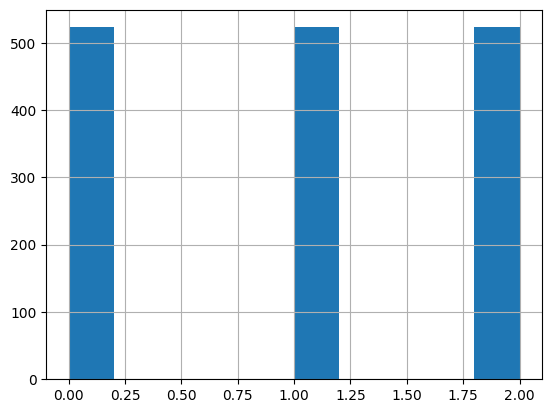

In [ ]:
df['engagement_scores'].hist()

<Axes: >

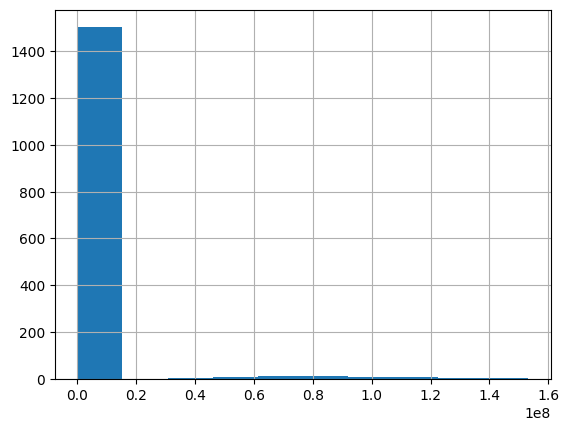

In [ ]:
df.target.hist()

In [ ]:
#Normalizamos los datos

##Analisis DE IMAGENES

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

In [ ]:
df['main_image_path']

,main_image_path
0,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...
...,...
1564,data_main/a1058fc5-8b4e-43db-8758-2a4197eb69ca...
1565,data_main/77df8476-484e-436e-8977-f957f6b9371a...
1566,data_main/21c741f5-cbe7-4ae0-a69d-b5c1622056af...
1567,data_main/4b8b38fa-78b5-4ea8-a676-1de4e2b48caa...


In [ ]:
df['main_image_path'].apply(lambda x : cv2.imread(x).shape).value_counts()

,count
main_image_path,
"(128, 128, 3)",1569


array([[[13,  7,  8],
        [13,  7,  8],
        [13,  7,  8],
        ...,
        [14,  8,  9],
        [14,  8,  9],
        [14,  8,  9]],

       [[13,  7,  8],
        [13,  7,  8],
        [13,  7,  8],
        ...,
        [14,  8,  9],
        [14,  8,  9],
        [14,  8,  9]],

       [[13,  7,  8],
        [13,  7,  8],
        [13,  7,  8],
        ...,
        [14,  8,  9],
        [14,  8,  9],
        [14,  8,  9]],

       ...,

       [[14, 16, 24],
        [10, 12, 20],
        [11, 14, 19],
        ...,
        [13,  8, 10],
        [14,  8,  9],
        [14,  8,  9]],

       [[ 0,  2, 10],
        [ 0,  2, 10],
        [ 0,  2, 10],
        ...,
        [13,  7,  8],
        [13,  7,  8],
        [13,  7,  8]],

       [[ 0,  3, 11],
        [ 4,  7, 15],
        [ 4,  6, 14],
        ...,
        [12,  6,  7],
        [12,  6,  7],
        [12,  6,  7]]], dtype=uint8)
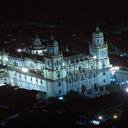

In [ ]:
cv2.imread(df['main_image_path'].iloc[random.randint(0,len(df))])

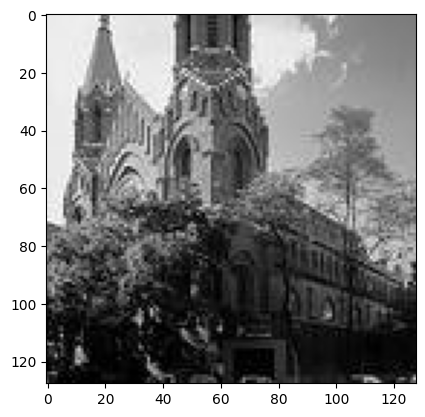

In [ ]:
#Para ver las imagenes que tenemos

plt.imshow(cv2.imread(df['main_image_path'].iloc[random.randint(0,len(df))]))

Las imagenes nosotros no la podemos procesar como los metadatos. Asique he hecho una pequeña visualizacion de algunas y voy a preparar todos los datos para que la red ueda profcesarlos en un data set

##Dataset

In [ ]:
#Creo el DataSet

#Primero hay que pasar las imagenes a vectores de Pytorch para que la red pueda trabajar con ellas

from torch.utils.data import Dataset, random_split #librerias para Dataset personalizado
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import pandas as pd


In [87]:
#Defino los grupos de datos y cogemos sus valores pasandolo a numpy
# 1.1  Rutas de imagen
img_paths = df['main_image_path'].to_numpy()

# 1.2  Metadatos numéricos
meta_cols = df.drop(columns=[
        'main_image_path', 'Visits', 'Likes', 'Dislikes',
        'target', 'Bookmarks','engagement_scores']).columns
meta_raw  = df[meta_cols].to_numpy(dtype='float32')

# 1.3  Etiquetas
labels = df['engagement_scores'].to_numpy(dtype='int64')


In [ ]:
from sklearn.model_selection import train_test_split
#Division en train,eval, test
#Test 15 %
resto_img, test_img, resto_meta, test_meta, resto_y, test_y = train_test_split(
    img_paths, meta_raw, labels,
    test_size=0.15, random_state=42
)

#Validación 15 % del total  (≈17.6 % de 'resto')
val_frac = 0.15 / 0.85

train_img, val_img, train_meta, val_meta, train_y, val_y = train_test_split(
    resto_img, resto_meta, resto_y,
    test_size=val_frac, random_state=42
)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Escalo los metadatos
scaler = MinMaxScaler()
scaler.fit(train_meta)# solo con TRAIN

#aplicamos el escalado a los metadatos
train_meta = scaler.transform(train_meta)
val_meta   = scaler.transform(val_meta)
test_meta  = scaler.transform(test_meta)


In [ ]:
import cv2, torch
from torch.utils.data import Dataset
from torchvision import transforms

# Definimos las transformaciones
tf_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1)),
    transforms.ColorJitter(0.2, 0.2, 0.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),                       # [0,1]
    transforms.Normalize([0.5]*3, [0.5]*3)       # [-1,1]
])

tf_eval = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

#Creo un Dataset personalizado que pueda trabjar con imagenes y metadatos
class POIDataset(Dataset):
    def __init__(self, paths, meta, labels, tf):
        self.paths  = paths
        self.meta   = torch.as_tensor(meta,   dtype=torch.float32)
        self.labels = torch.as_tensor(labels, dtype=torch.long)
        self.tf     = tf

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        # --- Imagen ------------------------------------------------------
        img = cv2.imread(self.paths[idx])                    # BGR uint8
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)           # RGB
        img = self.tf(img)                                   # Tensor C×H×W

        # --- Metadatos + etiqueta ---------------------------------------
        meta  = self.meta[idx]
        label = self.labels[idx]

        # Orden habitual: (imagen, metadatos, etiqueta)
        return img, meta, label


In [ ]:
#Hago instacias del dataset con los grupos de datos

train_ds = POIDataset(train_img, train_meta, train_y, tf=tf_train)
val_ds   = POIDataset(val_img,   val_meta,   val_y, tf=tf_eval)
test_ds  = POIDataset(test_img,  test_meta,  test_y, tf=tf_eval)


In [ ]:
from torch.utils.data import DataLoader
#Defino los Dataloaders con un bs 64
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True,  num_workers=0, pin_memory=True)
val_dl   = DataLoader(val_ds,   batch_size=64, shuffle=False, num_workers=0, pin_memory=True)
test_dl  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=0, pin_memory=True)


In [ ]:
# prompt: Para verl las dimesiones en el dataloader

for images, metadata, labels in train_dl:
    print("Image batch shape:", images.shape)
    print("Metadata batch shape:", metadata.shape)
    print("Label batch shape:", labels.shape)
    break  # Only show the dimensions of the first batch

Image batch shape: torch.Size([64, 3, 128, 128])
Metadata batch shape: torch.Size([64, 17])
Label batch shape: torch.Size([64])


##Modelo

In [ ]:


n_meta     = train_meta.shape[1]          # columnas numéricas + one-hot
n_classes  = int(max(train_y) + 1)        # cuenta etiquetas



In [ ]:
#Creo una clase para la red, que tendra capas convulucionales para las imagenes y un clasificador al final donde entre un vector comun con los metadtos y las imagenes
import torch, torch.nn as nn, torchvision.models as models

n_meta= train_meta.shape[1] # columnas numéricas + one-hot = 34

n_classes  = int(max(train_y) + 1)        # cuenta etiquetas

import torch
import torch.nn as nn
import torchvision.models as models

class POIClassifier(nn.Module):
    def __init__(self, n_meta: int, n_classes: int):
        super().__init__()
        # ---------- CNN para la imagen ----------
        #self.cnn = models.resnet18(weights=None)
        #self.cnn.fc = nn.Identity()
        # imgenes
        self.conv = nn.Sequential(
            nn.Conv2d(3,   32, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),#

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.flatten = nn.Flatten()

        # Metadatos
        self.meta_mlp = nn.Sequential(
            nn.Linear(n_meta, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
        )

        self.img_feat = 128 * 16 * 16

        # clasificador
        self.classifier = nn.Sequential(
            nn.Linear(self.img_feat + 32, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, n_classes)
        )

    def forward(self, img, meta):
        feat_img  = self.flatten(self.conv(img)) #como sale en 4D hay que aplanar el vector para poder unuirlos
        feat_meta = self.meta_mlp(meta)
        fused     = torch.cat([feat_img, feat_meta], dim=1)
        return self.classifier(fused)


In [ ]:
#from module_utils import *
import torch.optim as optim

In [ ]:
#funcion de entrenamiento
def train_epoch(model: nn.Module, device: torch.device, train_loader: DataLoader,
                criterion, optimizer, scheduler= None):
    """
    Entrena una época de la red neuronal y devuelve las métricas de entrenamiento.

    Args:
        model: Modelo de red neuronal a entrenar
        device: Dispositivo donde se realizará el entrenamiento (CPU/GPU)
        train_loader: DataLoader con los datos de entrenamiento
        criterion: Función de pérdida a utilizar
        optimizer: Optimizador para actualizar los pesos
        scheduler: Scheduler para ajustar el learning rate

    Returns:
        train_loss: Pérdida promedio en el conjunto de entrenamiento
        train_acc: Precisión en el conjunto de entrenamiento (%)
        current_lr: Learning rate actual después del scheduler
    """
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (img, meta, target) in enumerate(train_loader):
        img, meta, target = img.to(device), meta.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(img, meta)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100. * correct / total

    # Aplicar el scheduler después de cada época
    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]

    return train_loss, train_acc, current_lr

In [ ]:
#Funcion de evaluacion
def eval_epoch(model: nn.Module, device: torch.device, val_loader: DataLoader,
               criterion):
    """
    Evalúa el modelo en el conjunto de validación.

    Args:
        model: Modelo de red neuronal a evaluar
        device: Dispositivo donde se realizará la evaluación (CPU/GPU)
        val_loader: DataLoader con los datos de validación
        criterion: Función de pérdida a utilizar

    Returns:
        val_loss: Pérdida promedio en el conjunto de validación
        val_acc: Precisión en el conjunto de validación (%)
    """
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for img, meta, target in val_loader:
            img, meta, target = img.to(device), meta.to(device), target.to(device)
            output = model(img, meta)
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100. * correct / total

    return val_loss, val_acc

In [88]:
# Entrenamos el modelo
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



# Creamos una instancia del modelo
model = POIClassifier(n_meta, n_classes).to(device)
model.to(device)
# Definimos la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)




# Entrenamiento
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []
for epoch in range(num_epochs):
    loss, acc,_ = train_epoch(model, device, train_dl, criterion, optimizer,scheduler)
    val_loss, val_acc = eval_epoch(model, device, val_dl, criterion)
    train_losses.append(loss)
    train_accs.append(acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Epoch {epoch+1}, Loss: {loss}, Acc: {acc}, Val Loss: {val_loss}, Val Acc: {val_acc}')


Epoch 1, Loss: 1.1218255096011691, Acc: 37.64813126709207, Val Loss: 1.079649657011032, Val Acc: 31.779661016949152
Epoch 2, Loss: 1.0307245420085058, Acc: 49.22515952597995, Val Loss: 0.9326535016298294, Val Acc: 62.28813559322034
Epoch 3, Loss: 0.898385634024938, Acc: 61.71376481312671, Val Loss: 0.8213520050048828, Val Acc: 67.79661016949153
Epoch 4, Loss: 0.7536472280820211, Acc: 69.73564266180492, Val Loss: 0.7599957138299942, Val Acc: 68.64406779661017
Epoch 5, Loss: 0.7152528133657243, Acc: 68.64175022789426, Val Loss: 0.7285967618227005, Val Acc: 68.22033898305085
Epoch 6, Loss: 0.69756304886606, Acc: 70.00911577028259, Val Loss: 0.7302047312259674, Val Acc: 68.22033898305085
Epoch 7, Loss: 0.6849264767434862, Acc: 72.01458523245215, Val Loss: 0.692778080701828, Val Acc: 69.91525423728814
Epoch 8, Loss: 0.656890932056639, Acc: 72.47037374658159, Val Loss: 0.7293376177549362, Val Acc: 68.22033898305085
Epoch 9, Loss: 0.6352980815702014, Acc: 71.83226982680037, Val Loss: 0.724596

In [ ]:
#Funcion de evaluacion
def evaluate_model(model, testloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for img, data, labels in testloader:
            img, data, labels = img.to(device), data.to(device), labels.to(device)
            outputs = model(img, data)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100.*correct / total

In [ ]:
# Evaluación
accuracy = evaluate_model(model, test_dl, device)
print('Test accuracy: %.3f' % accuracy)

Test accuracy: 67.373


In [ ]:
#Funcion comparacion grafica
def plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=None):
    plt.style.use("ggplot")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label="Train Loss")
    plt.plot(range(num_epochs), val_losses, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accs, label="Train Accuracy")
    plt.plot(range(num_epochs), val_accs, label="Validation Accuracy")
    if test_acc is not None:
        plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()


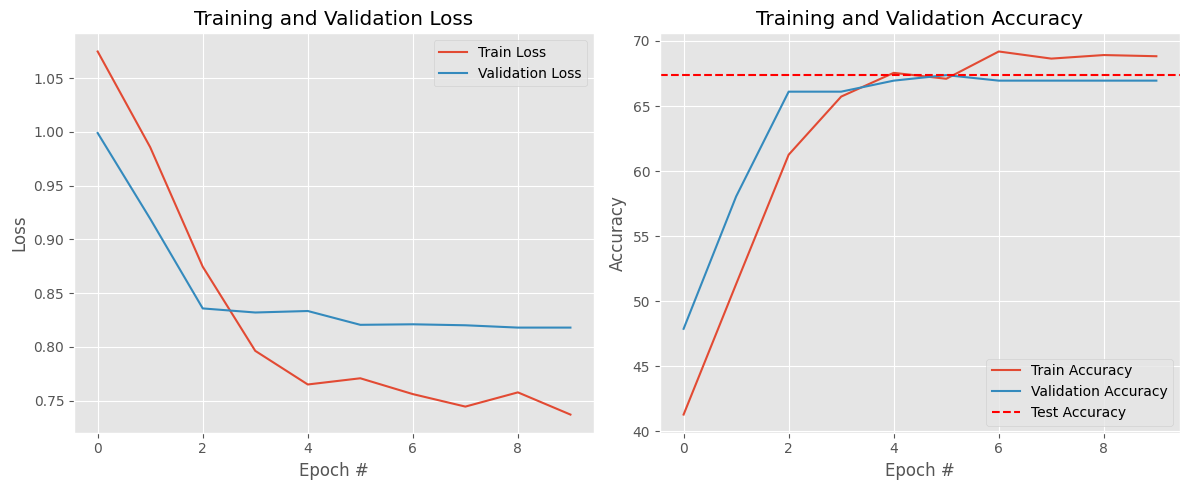

In [ ]:
plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=accuracy)

##Modelo preentrenado con Resnet

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import numpy as np
from torch.utils.data import random_split

In [ ]:
# Definimos las transformaciones necesarias para ResNet
IMG_SIZE = 224
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

tf_train_rn = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ColorJitter(0.2, 0.2, 0.2),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)#normalizacion imagenes
])

tf_eval_rn = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(IMG_SIZE + 32),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std)
])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_meta)                   # solo con TRAIN

train_meta_rn = scaler.transform(train_meta)
val_meta_rn   = scaler.transform(val_meta)
test_meta_rn  = scaler.transform(test_meta)


In [ ]:
train_ds_rn = POIDataset(train_img, train_meta_rn, train_y, tf=tf_train_rn)
val_ds_rn   = POIDataset(val_img,   val_meta_rn,   val_y, tf=tf_eval_rn)
test_ds_rn  = POIDataset(test_img,  test_meta_rn,  test_y, tf=tf_eval_rn)

In [ ]:
from torch.utils.data import DataLoader

train_dl_rn = DataLoader(train_ds_rn, batch_size=64, shuffle=True,  num_workers=2, pin_memory=True)
val_dl_rn  = DataLoader(val_ds_rn,   batch_size=64, shuffle=False, num_workers=2, pin_memory=True)
test_dl_rn  = DataLoader(test_ds_rn,  batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

In [ ]:
import torch.nn as nn
import torchvision.models as models

class POIClassifierIM(nn.Module):
    def __init__(self, n_meta: int, n_classes: int,
                 freeze_backbone: bool = True):
        super().__init__()

        # modelo preentrenado
        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1   # PyTorch ≥ 2.0
            # pretrained=True            # si usas una versión antigua
        )
        # quitamos la FC final y nos quedamos con el vector de features
        num_feats = backbone.fc.in_features
        backbone.fc = nn.Identity()
        self.backbone = backbone

        if freeze_backbone:# fine-tuning parcial
            for p in self.backbone.parameters():
                p.requires_grad = False
            # Descongela solo las últimas capas si quieres
            for p in self.backbone.layer4.parameters():
                p.requires_grad = True

        # Metadatos
        self.meta_mlp = nn.Sequential(
            nn.Linear(n_meta, 64), nn.ReLU(inplace=True),
            nn.Linear(64, 32),     nn.ReLU(inplace=True)
        )

        # Clasificador
        self.classifier = nn.Sequential(
            nn.Linear(num_feats + 32, 128), nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, n_classes)
        )

    def forward(self, imgs, meta):
        f_img  = self.backbone(imgs)
        f_meta = self.meta_mlp(meta)
        fused  = torch.cat([f_img, f_meta], dim=1)
        return self.classifier(fused)


In [ ]:
# Entrenamos el modelo
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_rn = POIClassifierIM(
    n_meta=train_meta_rn.shape[1],
    n_classes=int(train_y.max() + 1),
    freeze_backbone=True
).to(device)

In [90]:
opt = torch.optim.Adam(
    [
        {"params": model_rn.backbone.layer4.parameters(), "lr": 1e-2},#4
        {"params": model_rn.meta_mlp.parameters()},
        {"params": model_rn.classifier.parameters()},
    ],
    lr=1e-3, weight_decay=1e-4
)
sched = torch.optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.1)
criterion = nn.CrossEntropyLoss()

In [ ]:
#Modifico esta funcion como voy a sacar el schduler del bucle por batch porque se me desvanece el lr
def train_epoch2(model: nn.Module, device: torch.device, train_loader: DataLoader,
                criterion, optimizer):
    """
    Entrena una época de la red neuronal y devuelve las métricas de entrenamiento.

    Args:
        model: Modelo de red neuronal a entrenar
        device: Dispositivo donde se realizará el entrenamiento (CPU/GPU)
        train_loader: DataLoader con los datos de entrenamiento
        criterion: Función de pérdida a utilizar
        optimizer: Optimizador para actualizar los pesos
        scheduler: Scheduler para ajustar el learning rate

    Returns:
        train_loss: Pérdida promedio en el conjunto de entrenamiento
        train_acc: Precisión en el conjunto de entrenamiento (%)
        current_lr: Learning rate actual después del scheduler
    """
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (img, meta, target) in enumerate(train_loader):
        img, meta, target = img.to(device), meta.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(img, meta)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100. * correct / total

    # Aplicar el scheduler después de cada época
    #scheduler.step()
    #current_lr = scheduler.get_last_lr()[0]

    return train_loss, train_acc

In [91]:
# Entrenamiento
num_epochs = 10
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(num_epochs):
    loss, acc = train_epoch2(model_rn, device, train_dl_rn, criterion, optimizer = opt)

    # Validación
    val_loss, val_acc = eval_epoch(model_rn, device, val_dl_rn, criterion)

    sched.step() #para evitar el desvanecimiento del lr
    lr = sched.get_last_lr()[0]

    # Guardo métricas
    train_losses.append(loss)
    train_accs.append(acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f'Epoch {epoch+1}, Train Loss: {loss:.4f}, Train Acc: {acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, LR: {lr:.6f}')



Epoch 1, Train Loss: 0.6433, Train Acc: 69.0064, Val Loss: 1.2502, Val Acc: 61.0169, LR: 0.010000
Epoch 2, Train Loss: 0.5825, Train Acc: 73.9289, Val Loss: 0.7158, Val Acc: 65.2542, LR: 0.010000
Epoch 3, Train Loss: 0.5947, Train Acc: 72.0146, Val Loss: 0.6868, Val Acc: 70.3390, LR: 0.010000
Epoch 4, Train Loss: 0.5610, Train Acc: 73.3820, Val Loss: 0.6835, Val Acc: 71.6102, LR: 0.010000


KeyboardInterrupt: 

In [73]:
# Evaluación
accuracy = evaluate_model(model_rn, test_dl_rn, device)
print('Test accuracy: %.3f' % accuracy)



Test accuracy: 64.831


In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=None):
    """
    Visualiza las curvas de entrenamiento mostrando la evolución del loss y
    la precisión durante el entrenamiento
    """
    plt.style.use("ggplot")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label="Train Loss")
    plt.plot(range(num_epochs), val_losses, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accs, label="Train Accuracy")
    plt.plot(range(num_epochs), val_accs, label="Validation Accuracy")
    if test_acc is not None:
        plt.axhline(y=test_acc, color='red', linestyle='--', label='Test Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

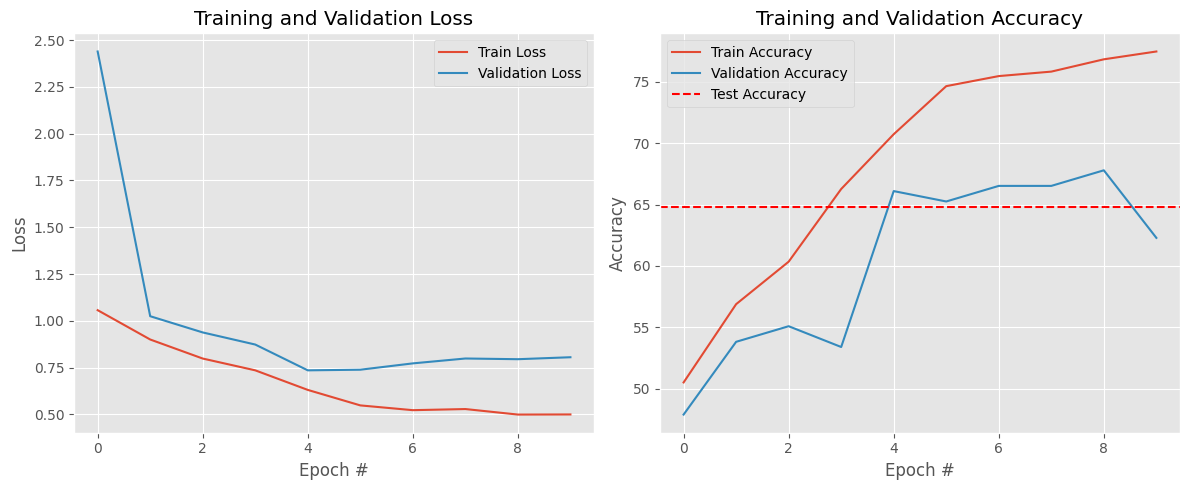

In [74]:
plot_training_curves(train_losses, val_losses, train_accs, val_accs, num_epochs, test_acc=accuracy)

Hay mucho over fitting. Voy a pasar por optuna los parametro para mejorar los hiperparametro e intantar mejorar el modelo y reducir el overfitting

##Optimizacion

In [78]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 19.6 MB/s eta 0:00:00


In [81]:
# ¡instala Optuna si no lo tienes!
# !pip install optuna
import optuna
from torch.utils.data import DataLoader
import numpy as np, random, time

SEED = 42
def fix_seed(seed=SEED):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------------------------------------------------------------
# Función que crea DataLoaders en función del batch size
def make_loaders(batch):
    train_ds = POIDataset(train_img, train_meta_rn, train_y, tf=tf_train_rn)
    val_ds   = POIDataset(val_img,   val_meta_rn,   val_y, tf=tf_eval_rn)
    train_dl = DataLoader(train_ds, batch_size=batch, shuffle=True,
                          num_workers=2, pin_memory=True)
    val_dl   = DataLoader(val_ds,   batch_size=batch, shuffle=False,
                          num_workers=2, pin_memory=True)
    return train_dl, val_dl

# ---------------------------------------------------------------------
# Función objetivo para Optuna
EPOCHS_PER_TRIAL = 4          # pocas épocas para que cada prueba sea rápida

def objective(trial: optuna.Trial):

    fix_seed(SEED)

    # --------------- espacio de búsqueda ----------------------------
    batch_sz        = trial.suggest_categorical("batch", [32, 64, 128, 256])
    lr_backbone     = trial.suggest_float("lr_backbone", 1e-5, 5e-4, log=True)
    lr_head         = trial.suggest_float("lr_head",     1e-4, 5e-3, log=True)
    dropout_p       = trial.suggest_float("dropout", 0.1, 0.5)
    hidden_meta     = trial.suggest_int("hidden_meta", 16, 128, step=16)
    unfreeze_choice = trial.suggest_categorical("unfreeze", ["none", "layer4", "all"])

    train_dl, val_dl = make_loaders(batch_sz)

    # --------------- modelo -----------------------------------------
    model = POIClassifierIM(
        n_meta=train_meta_rn.shape[1],
        n_classes=int(train_y.max() + 1),
        freeze_backbone=True        # luego abrimos capas si toca
    )

    # Un-freeze backbone según la opción
    if unfreeze_choice == "all":
        for p in model.backbone.parameters(): p.requires_grad = True
    elif unfreeze_choice == "layer4":
        for p in model.backbone.layer4.parameters(): p.requires_grad = True
    # "none" → sólo layer4 está abierta (por constructor)

    # Reemplazamos el MLP de metadatos con hidden variable
    model.meta_mlp = nn.Sequential(
        nn.Linear(train_meta_rn.shape[1], hidden_meta),
        nn.ReLU(inplace=True),
        nn.Linear(hidden_meta, 32),
        nn.ReLU(inplace=True)
    )
    # Ajustamos dropout
    model.classifier[2] = nn.Dropout(dropout_p)

    model.to(device)

    # --------------- optimizador y scheduler -------------------------
    opt = torch.optim.Adam(
        [
            {"params": [p for p in model.backbone.parameters()
                        if p.requires_grad], "lr": lr_backbone},
            {"params": model.meta_mlp.parameters()},
            {"params": model.classifier.parameters()},
        ],
        lr=lr_head, weight_decay=1e-4
    )
    sched = torch.optim.lr_scheduler.StepLR(opt, step_size=3, gamma=0.1)
    crit  = nn.CrossEntropyLoss()

    best_val_acc = 0.0

    # --------------- mini-entrenamiento ------------------------------
    for epoch in range(EPOCHS_PER_TRIAL):
        train_epoch2(model, device, train_dl, crit, opt)       # tu función
        val_loss, val_acc = eval_epoch(model, device, val_dl, crit)

        sched.step()       # una vez por época
        best_val_acc = max(best_val_acc, val_acc)

        # ---- pruning -------------------------------------------------
        trial.report(1 - val_acc, epoch)      # Optuna minimiza
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return 1 - best_val_acc   # cuanto más pequeño mejor

# ---------------------------------------------------------------------
# Ejecutamos el estudio
study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=SEED),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=1)
)

study.optimize(objective, n_trials=30, timeout=60*60)   # 30 pruebas o 1 h máx.

# ---------------------------------------------------------------------
# Resultados
print("🥇  Mejor val_acc =", 1 - study.best_value)
print("🛠️  Hiperparámetros óptimos:")
for k, v in study.best_params.items():
    print(f"   {k}: {v}")


[I 2025-06-08 19:22:02,976] A new study created in memory with name: no-name-14c1c4f2-8a5d-4550-a232-6ae43f91ac83
[I 2025-06-08 19:34:18,216] Trial 0 finished with value: -51.11864406779661 and parameters: {'batch': 64, 'lr_backbone': 1.8410729205738674e-05, 'lr_head': 0.00018408992080552527, 'dropout': 0.12323344486727979, 'hidden_meta': 112, 'unfreeze': 'layer4'}. Best is trial 0 with value: -51.11864406779661.
[I 2025-06-08 19:48:43,399] Trial 1 finished with value: -54.50847457627118 and parameters: {'batch': 32, 'lr_backbone': 2.049268011541735e-05, 'lr_head': 0.0003287747413991121, 'dropout': 0.3099025726528951, 'hidden_meta': 64, 'unfreeze': 'layer4'}. Best is trial 1 with value: -54.50847457627118.
[I 2025-06-08 20:02:19,321] Trial 2 finished with value: -49.42372881355932 and parameters: {'batch': 256, 'lr_backbone': 2.1839352923182963e-05, 'lr_head': 0.000747599299995651, 'dropout': 0.33696582754481696, 'hidden_meta': 16, 'unfreeze': 'none'}. Best is trial 1 with value: -54.5

🥇  Mejor val_acc = 55.50847457627118
🛠️  Hiperparámetros óptimos:
   batch: 32
   lr_backbone: 2.049268011541735e-05
   lr_head: 0.0003287747413991121
   dropout: 0.3099025726528951
   hidden_meta: 64
   unfreeze: layer4


In [ ]:
transformaciones = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
#Defino funcion para procesar los metadatos. Escalarlos con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

def procesado_metadatos(metadatos, scaler=None ):
  """
  Funcion que estandariza los metadatos
  Entra un df
  devuelve un array
  """
  if scaler:
    metadadatos= scaler.transform(metadatos)

  return metadatos


In [ ]:
#Creamos una clase tipo Dataset (hereda de Dataset) Es la clase con la que vamos a entrenar a la red
class POIDataset(Dataset):

  def __init__(self, metadatos, main_image_path, target, transform= None, scaler= None): #Inicializador con self para referenciarse asi mismo.
  #Aqui indicamos los datos que recibe el Dataset (todas las cosas que hemos ido procesando) En este caso las imagenes,
  #los metadatos y las etiquetas como estamos en clasificacion.
    assert len(target) == len(metadatos) #Aseguramos que hay la misma cantidad de imagenes y metadatos que targets para la logitud del dataset
    assert len(target) == len(main_image_path)

    self.target = torch.tensor(target)#tiene que ser un tensor


    self.metadatos = torch.tensor(procesado_metadatos(metadatos,scaler))#tiene que ser un tensor
    self.main_image_path = main_image_path #Es un tipo path #hay que cambiar los canales
    self.transform = transform
    self.scaler = scaler



  def __len__(self):#Marcamos el tamaño del dataset
    return len(self.metadatos)

  def __getitem__(self,idx):#Que queremos devolver y como lo devolvemos. De aqui tienen que salir los datos estructurados para ña red

    target = self.target[idx]
    metadatos = self.metadatos[idx]
    im = cv2.imread(self.main_image_path[idx])

    if self.transform is not None:
      im = self.transform(im)

    return target, metadatos, im


In [ ]:
dataset = POIDataset(target = df['target'].values,
                     main_image_path = df['main_image_path'],
                     metadatos = df.drop(columns=['main_image_path', 'Visits', 'Likes', 'Dislikes','target','Bookmarks']).values,

                     transform = transformaciones

                     )

In [ ]:
dataset

In [ ]:
columnas =

In [ ]:
from sklearn.model_selection import train_test_split

# Test (15%)
resto_img, test_img, resto_meta, test_meta, resto_y, test_y = train_test_split(
    dataset.main_image_path, dataset.metadatos, dataset.target, test_size=0.15, random_state=42
)

# Train y validacion
train_img, val_img, train_meta, val_meta, train_y, val_y = train_test_split(
    resto_img, resto_meta, resto_y, test_size=0.17, random_state=42
)

Escaldo

In [ ]:
#Escalo los datos con MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_meta)

# Aplicar a todos
train_meta_scaled = scaler.transform(train_meta)
val_meta_scaled   = scaler.transform(val_meta)
test_meta_scaled  = scaler.transform(test_meta)

array([[[108,  94,  96],
        [108,  94,  96],
        [108,  94,  96],
        ...,
        [101,  85,  92],
        [101,  85,  92],
        [101,  85,  92]],

       [[106,  92,  94],
        [106,  92,  94],
        [106,  92,  94],
        ...,
        [101,  85,  92],
        [101,  85,  92],
        [101,  85,  92]],

       [[104,  90,  92],
        [104,  90,  92],
        [104,  90,  92],
        ...,
        [102,  86,  93],
        [102,  86,  93],
        [102,  86,  93]],

       ...,

       [[ 55,  39,  46],
        [ 55,  39,  46],
        [ 55,  39,  46],
        ...,
        [103,  86,  89],
        [103,  86,  89],
        [103,  86,  89]],

       [[ 54,  38,  45],
        [ 54,  38,  45],
        [ 54,  38,  45],
        ...,
        [101,  84,  87],
        [102,  85,  88],
        [102,  85,  88]],

       [[ 54,  38,  45],
        [ 54,  38,  45],
        [ 54,  38,  45],
        ...,
        [100,  83,  86],
        [101,  84,  87],
        [101,  84,  87]]], dtype=uint8)
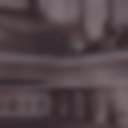

In [ ]:
cv2.imread(resto_img.iloc[random.randint(0,len(resto_img))])

In [ ]:
#Con augmentation transformamos y añadimos datos sisteticos y normalizamos
transform_img_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)])

In [ ]:
# Definimos transformaciones para validación y test (solo normalización)
transform_img_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)])

In [ ]:
train_img.transform = transform_img_train
val_img.transform = transform_img_test
test_img.transform = transform_img_test